In [5]:
import torch
print("PyTorch version", torch.__version__)
print("CUDA available", torch.cuda.is_available())

if torch.cuda.is_available():
    print("GPU name", torch.cuda.get_device_name(0))
    print("CUDA version", torch.version.cuda)
else:
    print("running on my pc")

PyTorch version 2.5.1+cu118
CUDA available True
GPU name NVIDIA GeForce RTX 3060
CUDA version 11.8


In [1]:
import warnings
warnings.simplefilter('ignore', category=FutureWarning)


In [60]:
import os
import pandas as pd
import numpy as np

folder_path = './'  # change if needed
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

for file in csv_files:
    try:
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)

        # Clean: replace "?" with NaN and drop fully empty columns
        df.replace("?", np.nan, inplace=True)
        df.dropna(axis=1, how='all', inplace=True)

        # Keep only numeric columns (remove junk like Unnamed)
        df = df.select_dtypes(include=[np.number])

        # Rename for consistency (optional)
        if df.shape[1] >= 2:
            df.columns = ['Time', 'Resistance'] + list(df.columns[2:])

        print(f"\n📄 Cleaned: {file} — First 10 rows:")
        print(df.head(10))
        input("🔘 Press Enter to continue...")

        # Optional: save cleaned CSV
        # df.to_csv(os.path.join(folder_path, f"cleaned_{file}"), index=False)

    except Exception as e:
        print(f"❌ Error processing {file}: {e}")



📄 Cleaned: ACRYLIC_1.csv — First 10 rows:
   Time  Resistance
0     1     7254.73
1     2     7893.90
2     3     8091.35
3     4     8130.83
4     5     7933.59
5     6     7961.72
6     7     8358.54
7     8     8730.94
8     9     8557.11
9    10    10247.37


🔘 Press Enter to continue... 



📄 Cleaned: BUBBLEWRAP BACK_1.csv — First 10 rows:
   Time  Resistance
0     1     6847.83
1     2     6686.18
2     3     6549.35
3     4     7614.00
4     5     9372.12
5     6     9121.49
6     7    10036.41
7     8     8791.25
8     9     8560.50
9    10     8874.89


🔘 Press Enter to continue... 



📄 Cleaned: BUBBLEWRAP FRONT_1.csv — First 10 rows:
   Time  Resistance
0     1     7055.57
1     2     6979.49
2     3     7127.05
3     4     7423.59
4     5     7858.91
5     6     9245.95
6     7     9482.47
7     8     9367.53
8     9     8369.98
9    10     9483.76


🔘 Press Enter to continue... 



📄 Cleaned: CARDBOARD_1.csv — First 10 rows:
   Time  Resistance
0     2     5346.55
1     3     5501.80
2     4     5531.54
3     5     5545.04
4     6     6592.86
5     7     7895.55
6     8     8019.89
7     9     9077.12
8    10     8045.05
9    11    11497.94


🔘 Press Enter to continue... 



📄 Cleaned: GLASS_1.csv — First 10 rows:
   Time  Resistance
0     1     7208.84
1     2     7259.89
2     3    11563.53
3     4    13599.23
4     5    13553.84
5     6    14325.82
6     7    15641.78
7     8    11884.10
8     9    17777.72
9    10    15003.44


🔘 Press Enter to continue... 



📄 Cleaned: GLASS_2.csv — First 10 rows:
   Time  Resistance
0     1     7208.84
1     2     7259.89
2     3    11563.53
3     4    13599.23
4     5    13553.84
5     6    14325.82
6     7    15641.78
7     8    11884.10
8     9    17777.72
9    10    15003.44


🔘 Press Enter to continue... 



📄 Cleaned: GLOVE_1.csv — First 10 rows:
   Time  Resistance
0     1     7782.02
1     2     7628.49
2     3     7524.28
3     4     7183.81
4     5     7720.31
5     6     9138.75
6     7     8881.72
7     8     9897.66
8     9     8701.35
9    10    14879.96


🔘 Press Enter to continue... 



📄 Cleaned: MARBLE_1.csv — First 10 rows:
   Time  Resistance
0     1     6820.29
1     2     5895.30
2     3     5896.01
3     4     8067.55
4     5   209707.92
5     6    13854.78
6     7     4522.74
7     8     3087.20
8     9    14389.56
9    10     4609.92


🔘 Press Enter to continue... 



📄 Cleaned: METAL_1.csv — First 10 rows:
   Time  Resistance
0     1     4967.72
1     2     4964.07
2     3     4917.59
3     4     4881.40
4     5     4909.83
5     6     5283.04
6     7     6088.49
7     8     5869.14
8     9     6261.73
9    10     7327.21


🔘 Press Enter to continue... 



📄 Cleaned: PAPER_1.csv — First 10 rows:
   Time  Resistance
0     1     8824.68
1     2    13266.33
2     3    16550.91
3     4    16923.30
4     5    20989.39
5     6    17369.66
6     7     7754.21
7     8    10820.73
8     9    13169.10
9    10    18509.35


🔘 Press Enter to continue... 



📄 Cleaned: SMOOTH WOODEN_1.csv — First 10 rows:
   Time  Resistance
0     1     6293.07
1     2     6246.57
2     3     6338.27
3     4     6673.42
4     5     6489.70
5     6     9311.93
6     7     8121.70
7     8    18523.31
8     9    14516.83
9    10     6838.91


🔘 Press Enter to continue... 


In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np
import os

folder_path = './'
target_surface = "GLASS"
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

features = []
labels = []

for file in csv_files:
    try:
        df = pd.read_csv(os.path.join(folder_path, file))
        df.replace("?", np.nan, inplace=True)
        df.dropna(axis=1, how='all', inplace=True)
        df = df.select_dtypes(include=[np.number])

        if df.shape[1] < 2:
            continue

        resistance = df.iloc[:, 1].astype(float).values
        resistance = resistance[:24] if len(resistance) >= 24 else np.pad(resistance, (0, 24 - len(resistance)), mode='edge')

        # Features
        vector = [
            np.mean(resistance),
            np.max(resistance),
            np.min(resistance),
            np.std(resistance),
            np.max(resistance) - np.min(resistance),
            np.mean(np.diff(resistance)),
            np.sum(resistance ** 2),
            np.mean(np.gradient(resistance))
        ]

        label = 1 if target_surface in file.upper() else 0
        features.append(vector)
        labels.append(label)

        # ✅ Duplicate the sample if it's the target (simulate extra examples)
        if label == 1:
            for i in range(2):  # duplicate 2 times
                noise = np.random.normal(0, 0.01, size=24)
                noisy_resistance = resistance + noise
                noisy_vector = [
                    np.mean(noisy_resistance),
                    np.max(noisy_resistance),
                    np.min(noisy_resistance),
                    np.std(noisy_resistance),
                    np.max(noisy_resistance) - np.min(noisy_resistance),
                    np.mean(np.diff(noisy_resistance)),
                    np.sum(noisy_resistance ** 2),
                    np.mean(np.gradient(noisy_resistance))
                ]
                features.append(noisy_vector)
                labels.append(1)

    except Exception as e:
        print(f"❌ Skipping {file}: {e}")

# Train-Test Split
X = np.array(features)
y = np.array(labels)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
print(f"\n✅ Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Not " + target_surface, target_surface]))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



✅ Accuracy: 60.00%

Classification Report:
              precision    recall  f1-score   support

   Not GLASS       1.00      0.33      0.50         3
       GLASS       0.50      1.00      0.67         2

    accuracy                           0.60         5
   macro avg       0.75      0.67      0.58         5
weighted avg       0.80      0.60      0.57         5

Confusion Matrix:
[[1 2]
 [0 2]]


In [53]:
target_surface = "GLASS"  
unseen_file = "GLASS_1.csv" 

features = []
labels = []


for file in csv_files:
    if file == unseen_file:
        continue  
    try:
        df = pd.read_csv(os.path.join(folder_path, file))
        df.replace("?", np.nan, inplace=True)
        df.dropna(axis=1, how='all', inplace=True)
        df = df.select_dtypes(include=[np.number])
        if df.shape[1] < 2: continue

        resistance = df.iloc[:, 1].astype(float).values
        resistance = resistance[:24] if len(resistance) >= 24 else np.pad(resistance, (0, 24 - len(resistance)), mode='edge')

        feature_vector = [
            np.mean(resistance),
            np.max(resistance),
            np.min(resistance),
            np.std(resistance),
            np.max(resistance) - np.min(resistance),
            np.mean(np.diff(resistance)),
            np.sum(resistance ** 2),
            np.mean(np.gradient(resistance))
        ]
        features.append(feature_vector)
        label = 1 if target_surface in file.upper() else 0
        labels.append(label)

    except Exception as e:
        print(f"❌ Error: {file} - {e}")


X_train = np.array(features)
y_train = np.array(labels)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


try:
    df = pd.read_csv(os.path.join(folder_path, unseen_file))
    df.replace("?", np.nan, inplace=True)
    df.dropna(axis=1, how='all', inplace=True)
    df = df.select_dtypes(include=[np.number])
    resistance = df.iloc[:, 1].astype(float).values
    resistance = resistance[:24] if len(resistance) >= 24 else np.pad(resistance, (0, 24 - len(resistance)), mode='edge')

    test_vector = [
        np.mean(resistance),
        np.max(resistance),
        np.min(resistance),
        np.std(resistance),
        np.max(resistance) - np.min(resistance),
        np.mean(np.diff(resistance)),
        np.sum(resistance ** 2),
        np.mean(np.gradient(resistance))
    ]
    y_pred = model.predict([test_vector])[0]
    print(f"\n🔍 Unseen Sample Prediction from {unseen_file}: {'GLASS' if y_pred == 1 else 'Not GLASS'}")

except Exception as e:
    print(f"❌ Failed on unseen file: {e}")



🔍 Unseen Sample Prediction from GLASS_1.csv: Not GLASS


## UNSEEN TEST DATA SAMPLE RUN

In [54]:
import os
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

folder_path = './'
target_surface = "GLASS"
train_file = "GLASS_1.csv"
test_file = "GLASS_2.csv"

features = []
labels = []

csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv') and f != test_file]


for file in csv_files:
    try:
        df = pd.read_csv(os.path.join(folder_path, file))
        df.replace("?", np.nan, inplace=True)
        df.dropna(axis=1, how='all', inplace=True)
        df = df.select_dtypes(include=[np.number])

        if df.shape[1] < 2:
            continue

        resistance = df.iloc[:, 1].astype(float).values
        resistance = resistance[:24] if len(resistance) >= 24 else np.pad(resistance, (0, 24 - len(resistance)), mode='edge')

        feature_vector = [
            np.mean(resistance),
            np.max(resistance),
            np.min(resistance),
            np.std(resistance),
            np.max(resistance) - np.min(resistance),
            np.mean(np.diff(resistance)),
            np.sum(resistance ** 2),
            np.mean(np.gradient(resistance))
        ]

        label = 1 if target_surface in file.upper() else 0
        features.append(feature_vector)
        labels.append(label)

    except Exception as e:
        print(f"❌ Skipping {file}: {e}")

X_train = np.array(features)
y_train = np.array(labels)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


try:
    df = pd.read_csv(os.path.join(folder_path, test_file))
    df.replace("?", np.nan, inplace=True)
    df.dropna(axis=1, how='all', inplace=True)
    df = df.select_dtypes(include=[np.number])

    resistance = df.iloc[:, 1].astype(float).values
    resistance = resistance[:24] if len(resistance) >= 24 else np.pad(resistance, (0, 24 - len(resistance)), mode='edge')

    test_vector = [
        np.mean(resistance),
        np.max(resistance),
        np.min(resistance),
        np.std(resistance),
        np.max(resistance) - np.min(resistance),
        np.mean(np.diff(resistance)),
        np.sum(resistance ** 2),
        np.mean(np.gradient(resistance))
    ]

    prediction = model.predict([test_vector])[0]
    result = target_surface if prediction == 1 else f"Not {target_surface}"
    print(f"\n🔍 Prediction for {test_file}: {result}")

except Exception as e:
    print(f"❌ Failed to predict {test_file}: {e}")



🔍 Prediction for GLASS_2.csv: GLASS


In [55]:
proba = model.predict_proba([test_vector])[0]
print(f"Confidence: {proba[1]*100:.2f}% for class GLASS")


Confidence: 63.00% for class GLASS


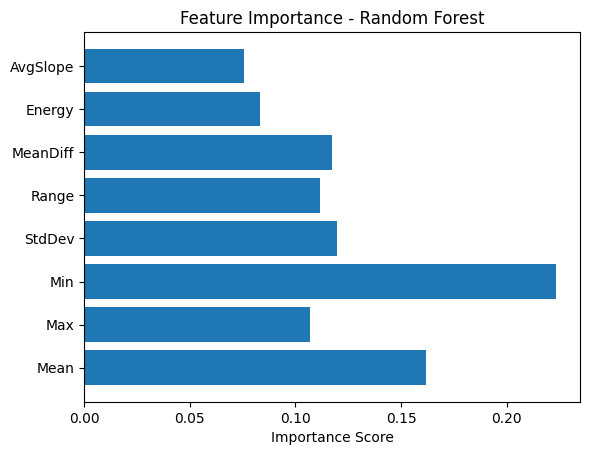

In [56]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
plt.barh(range(len(importances)), importances, tick_label=[
    "Mean", "Max", "Min", "StdDev", "Range", "MeanDiff", "Energy", "AvgSlope"
])
plt.xlabel("Importance Score")
plt.title("Feature Importance - Random Forest")
plt.show()


In [57]:
test_file = "PAPER_1.csv"  


In [58]:
try:
    df = pd.read_csv(os.path.join(folder_path, test_file))
    df.replace("?", np.nan, inplace=True)
    df.dropna(axis=1, how='all', inplace=True)
    df = df.select_dtypes(include=[np.number])

    resistance = df.iloc[:, 1].astype(float).values
    resistance = resistance[:24] if len(resistance) >= 24 else np.pad(resistance, (0, 24 - len(resistance)), mode='edge')

    test_vector = [
        np.mean(resistance),
        np.max(resistance),
        np.min(resistance),
        np.std(resistance),
        np.max(resistance) - np.min(resistance),
        np.mean(np.diff(resistance)),
        np.sum(resistance ** 2),
        np.mean(np.gradient(resistance))
    ]

    prediction = model.predict([test_vector])[0]
    proba = model.predict_proba([test_vector])[0]

    result = target_surface if prediction == 1 else f"Not {target_surface}"
    print(f"\n Prediction for {test_file}: {result}")
    print(f"Confidence: {proba[1]*100:.2f}% for class {target_surface}")

except Exception as e:
    print(f" Failed to predict {test_file}: {e}")



 Prediction for PAPER_1.csv: Not GLASS
Confidence: 14.00% for class GLASS


In [59]:
if prediction == 1:
    print(f"\n Prediction for {test_file}: {target_surface}")
    print(f"I'm {proba[1]*100:.2f}% confident this is {target_surface}")
else:
    print(f"\n Prediction for {test_file}: Not {target_surface}")
    print(f"I'm only {proba[1]*100:.2f}% confident this is {target_surface}")



 Prediction for PAPER_1.csv: Not GLASS
I'm only 14.00% confident this is GLASS


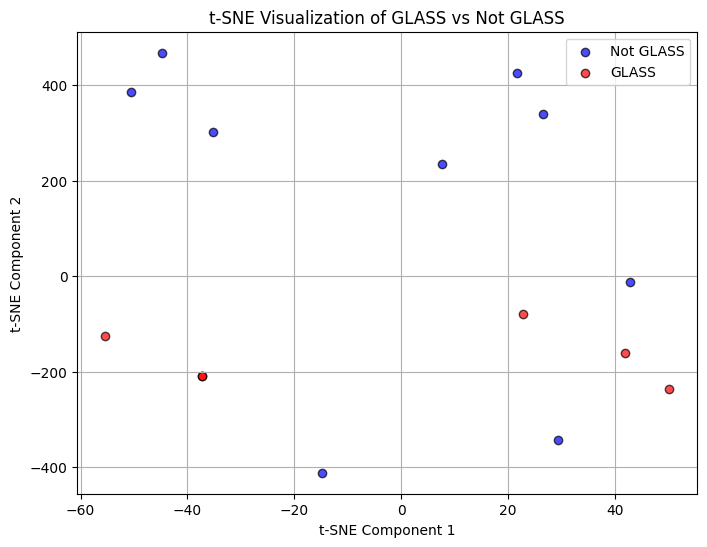

In [63]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

# Perform t-SNE on your feature matrix X
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot t-SNE results
plt.figure(figsize=(8,6))
for label, color, name in zip([0, 1], ['blue', 'red'], ['Not GLASS', 'GLASS']):
    idx = np.where(y == label)
    plt.scatter(X_tsne[idx, 0], X_tsne[idx, 1], c=color, label=name, alpha=0.7, edgecolors='k')

plt.title("t-SNE Visualization of GLASS vs Not GLASS")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend()
plt.grid(True)
plt.show()
